In [2]:
!pip install darts -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
etna 2.3.0 requires statsmodels<0.14,>=0.12, but you have statsmodels 0.14.0 which is incompatible.


In [1]:
import pandas as pd
from darts import TimeSeries
from moexalgo import Market, Ticker
import datetime

In [2]:
now_datetime = datetime.datetime.now().strftime("%Y-%m-%d")

sber = Ticker('SBER')
sber_candles = sber.candles(date='2023-10-10', till_date=now_datetime, period='10m')
# sber_candles = pd.DataFrame(sber_candles)

In [3]:
sber_candles['timestamp'] = sber_candles['begin']
sber_candles.dtype         s

SyntaxError: invalid syntax (2809727355.py, line 2)

In [4]:
ts = TimeSeries.from_dataframe(df = pd.DataFrame(sber_candles),
                          time_col='begin',
                          value_cols=["open", "close", "high", "low"],
                          freq='10 min')

<Axes: xlabel='begin'>

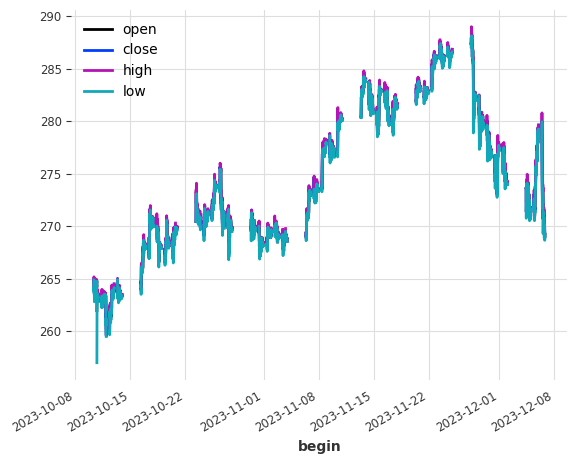

In [6]:
ts.plot()

In [15]:
TimeSeries.from_dataframe?

Signature:
TimeSeries.from_dataframe(
    df: pandas.core.frame.DataFrame,
    time_col: Optional[str] = None,
    value_cols: Union[List[str], str, NoneType] = None,
    fill_missing_dates: Optional[bool] = False,
    freq: Union[str, int, NoneType] = None,
    fillna_value: Optional[float] = None,
    static_covariates: Union[pandas.core.series.Series, pandas.core.frame.DataFrame, NoneType] = None,
    hierarchy: Optional[Dict] = None,
) -> typing_extensions.Self
Docstring:
Build a deterministic TimeSeries instance built from a selection of columns of a DataFrame.
One column (or the DataFrame index) has to represent the time,
and a list of columns `value_cols` has to represent the values for this time series.

Parameters
----------
df
    The DataFrame
time_col
    The time column name. If set, the column will be cast to a pandas DatetimeIndex (if it contains
    timestamps) or a RangeIndex (if it contains integers).
    If not set, the DataFrame index will be used. In this case the 